###Regresión Iterativa

In [1]:
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
import csv
import pandas as pd
import numpy as np
%matplotlib inline

#### 1) Se cargan el set de datos y se asigna el porcentaje de entrenamiento

In [3]:
data = pd.read_csv("regLin.csv")
print(data.head())
print(data.describe())

           X          y
0  35.657897  28.074403
1  48.685931  36.674434
2  95.861773  67.903577
3  25.997253  11.931727
4  49.964772  30.286144
                 X            y
count  1029.000000  1029.000000
mean     50.008111    32.893917
std      29.055066    18.083566
min       0.030369    -4.586608
25%      25.201087    17.583093
50%      50.884987    33.564129
75%      75.636823    48.339811
max      99.959580    71.762748


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(data[['X']], data['y'], train_size = 0.75)
print len(X_train), len(X_test)

771 258


#### 2) Transformación de los datos

In [11]:
X_scaler = pp.StandardScaler().fit(X_train)
X_scaled = pd.DataFrame(X_scaler.transform(X_train))
print X_scaled.head()

          0
0  0.198360
1 -0.981348
2  0.425039
3 -0.248748
4 -0.783771


In [12]:
Y_scaler = pp.StandardScaler().fit(Y_train)
Y_scaled = pd.DataFrame(Y_scaler.transform(Y_train))
print Y_scaled.head()

          0
0  0.355860
1 -0.810820
2  0.410995
3 -0.211172
4 -0.417195


#### 3) Se definen las funciones entrena y el actualizador de w's

In [7]:
def actualizador (w0, W, x_i):
    weight = w0
    for i in range(len(W)):
        weight = weight + (W[i] * x_i[i])
    return weight

In [8]:
def entrena(w0, W, X, Y, eta):
    for i in range(len(X)):
        x_i = X.iloc[i]
        y_hat = actualizador(w0, W, x_i)
        error = Y.iloc[i] - y_hat
        w0 = eta * error + w0
        for j in range(len(x_i)):
            W[j] = W[j] + (eta * error * X.iloc[i][j])
    return w0, W

####4) Valores iniciales para las iteraciones

In [23]:
w0 = 0
W = [1]#list(np.random.randint(0, 5, 1))
eta = 0.001

In [24]:
print (w0,W,eta)

(0, [1], 0.001)


#### 5) Entrenamos ahora los datos transformados para encontrar las w's

In [25]:
new_w=entrena(w0, W, X_scaled, Y_scaled, eta)
new_w

(0   -0.000372
 dtype: float64, [0    0.986212
  dtype: float64])

In [26]:
Y_hat = new_w[0] + (X_scaled * new_w[1])

####6) Visualización de la recta de regresión

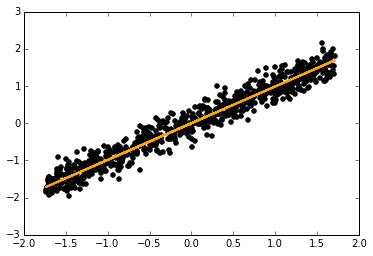

In [27]:
plt.scatter(X_scaled[0], Y_scaled[0], color = 'black')
plt.plot(X_scaled[0], Y_hat, color = 'orange', linewidth = 2)
plt.show()

In [28]:
Y_hat = pd.DataFrame(Y_hat)
Y_hat

,0
0,0 0.195253 dtype: float64
1,0 -0.96819 dtype: float64
2,0 0.418806 dtype: float64
3,0 -0.245691 dtype: float64
4,0 -0.773337 dtype: float64
5,0 -1.530543 dtype: float64
6,0 0.865546 dtype: float64
7,0 0.428964 dtype: float64
8,0 1.464488 dtype: float64
9,0 0.135763 dtype: float64
